In [2]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [7]:
class BatsmanState(TypedDict):
    runs: int
    balls_faced: int
    fours: int
    sixes: int
    strike_rate: float
    balls_per_boundary: float
    boundary_percentage: float
    summary: str

In [14]:
def calculate_strike_rate(state: BatsmanState):
    if state['balls_faced'] == 0:
        state['strike_rate'] = 0.0
    else:
        strike_rate = (state['runs'] / state['balls_faced']) * 100
    return {'strike_rate': strike_rate}

In [15]:
def calculate_balls_per_boundary(state: BatsmanState):
    if state['fours'] + state['sixes'] == 0:
        state['balls_per_boundary'] = float('inf')
    else:
        bpb = state['balls_faced'] / (state['fours'] + state['sixes'])
    return {'balls_per_boundary': bpb}

In [16]:
def calculate_boundary_percentage(state: BatsmanState) -> BatsmanState:
    if state['runs'] == 0:
        state['boundary_percentage'] = 0.0
    else:
        bp = ((state['fours'] * 4 + state['sixes'] * 6) / state['runs']) * 100
    return {'boundary_percentage': bp}

In [17]:
def generate_summary(state: BatsmanState) -> BatsmanState:
    summary = f"""
          Strike Rate: {state['strike_rate']:.2f} \n
          Balls Per Boundary: {state['balls_per_boundary']:.2f} \n
          Boundary Percentage: {state['boundary_percentage']:.2f}%
    """
    return {'summary': summary}

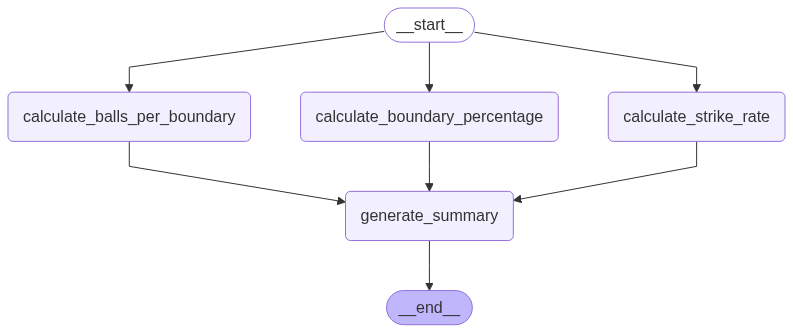

In [18]:
# Define the state graph
graph = StateGraph(BatsmanState)

# Add nodes to the graph
graph.add_node("calculate_strike_rate",calculate_strike_rate)
graph.add_node("calculate_balls_per_boundary", calculate_balls_per_boundary)
graph.add_node("calculate_boundary_percentage", calculate_boundary_percentage)
graph.add_node("generate_summary", generate_summary)

# Add edges to the graph
graph.add_edge(START, "calculate_strike_rate")
graph.add_edge(START, "calculate_balls_per_boundary")
graph.add_edge(START, "calculate_boundary_percentage")
graph.add_edge("calculate_strike_rate", "generate_summary")
graph.add_edge("calculate_balls_per_boundary", "generate_summary")
graph.add_edge("calculate_boundary_percentage", "generate_summary")
graph.add_edge("generate_summary", END)

# Compile the graph
workflow = graph.compile()
workflow

In [20]:
# Execute the workflow with an initial state
initial_state = {
    'runs': 120,
    'balls_faced': 100,
    'fours': 12,
    'sixes': 4
}

final_state = workflow.invoke(initial_state)
print(final_state)

{'runs': 120, 'balls_faced': 100, 'fours': 12, 'sixes': 4, 'strike_rate': 120.0, 'balls_per_boundary': 6.25, 'boundary_percentage': 60.0, 'summary': '\n          Strike Rate: 120.00 \n\n          Balls Per Boundary: 6.25 \n\n          Boundary Percentage: 60.00%\n    '}


In [22]:
print("Final summary:\n ", final_state['summary'])

Final summary:
  
          Strike Rate: 120.00 

          Balls Per Boundary: 6.25 

          Boundary Percentage: 60.00%
    
